## Wine Dataset Machine Learning Mini project

### Abstract

#### This project aims to apply various machine learning techniques on a dataset which contains chemical components included in Wine products. K-means, PCA(Principle Componenet Alaysis), silhouette scoring, Random Forest has been applied and analyzed with the Wine dataset. 


### Aim of this project
#### The objective is to assess the performance of these algorithms in understanding the dataset's structure and preducting wine classes.

### Introduction

#### Machine learning techniques are integral to uncovering patterns in complex datasets like Wine dataset. This project focuses on implementing and evaluating Machine Learning Algorithms that has been mentioned on Abstract and the dataset contains oenological features, making it an intriguing domain for exploring machine learning algorithms. K-means, and PCA has manual implementation of Machine learning Algorithms, HDB scan, silhouette scoring has beem imported from varous libraries like sklearn.

### Importing dataset and necessary libraries

In [1]:
#import necessary libraries and import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None, names=columns)

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### BackGround

#### K- means  Clustering and Silhouette Scores:
#### K-Means is a partitioning lagorithm aiming to group data points into distinct clusters. Silhouette scores measure the cohesion and seperation of these clusters, providing insight into the clustering quality

In [2]:
#K-Means Analysis: standardization and data splitting necessary
#Standardization, train test split
#Define manual train-test split function
def manual_train_test_split(data, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_size)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Manual train-test split
train_data, test_data = manual_train_test_split(df, test_size=0.2, random_state=42)

In [3]:
# Manual standardization function
def manual_standardization(data):
    mean = data.mean()
    std = data.std()
    standardized_data = (data - mean) / std
    return standardized_data

# Separate features (X) and target variable (y) for training and testing sets
X_train = manual_standardization(train_data.drop('Class', axis=1)).values
y_train = train_data['Class'].values
X_test = manual_standardization(test_data.drop('Class', axis=1)).values
y_test = test_data['Class'].values

In [4]:
X_train

array([[ 1.0900794 , -0.42094796,  0.81591685, ..., -0.32501422,
         1.32631847,  1.18109776],
       [ 1.65058454, -0.60505905,  1.21033517, ..., -1.6534192 ,
        -0.8832466 , -0.25569086],
       [-0.55488134,  2.75277651,  0.99519791, ..., -0.58212486,
        -1.2561107 , -0.7346204 ],
       ...,
       [ 1.69932412, -0.43848235,  0.06293643, ...,  1.04624253,
         0.5529707 ,  2.67403674],
       [-0.35992303, -0.73656697, -0.3673381 , ...,  0.01779997,
        -0.74514878, -0.80067965],
       [-0.78639434,  0.07001494,  0.34978611, ..., -0.66782841,
         1.0777424 , -0.9889485 ]])

In [5]:
X_test

array([[ 0.73710789,  0.8846328 ,  0.68522365, -1.60331813,  1.50807825,
         0.71453773,  0.96582865, -1.66049669,  0.26512845,  0.02167655,
        -0.01896533,  1.06435921,  0.16372423],
       [ 1.46509316,  1.80682606,  0.22028999, -0.28837388,  1.11417722,
         0.97741951,  0.57299926, -0.40755143, -0.50192665,  0.08168503,
        -0.44568522,  1.01866922,  0.81176649],
       [-0.16968078,  0.60012637,  1.22764625,  0.45794584, -0.06752589,
        -1.31841474, -1.64958807,  1.80919788, -1.43735971, -0.19263946,
        -0.91981844, -0.53479046, -0.51189429],
       [ 0.85205293, -0.68505785,  1.22764625,  0.99103135,  0.32637514,
         1.2403013 ,  1.19325619, -0.50393183,  1.61215205,  0.27885576,
         1.07154107,  0.07440941,  1.37707995],
       [-0.88489437, -1.00880654, -1.79442251, -0.03960064, -1.48556962,
        -0.31946396, -0.09894575, -0.69669264, -0.89480853, -0.1583489 ,
         0.73964782,  1.24711917, -0.76008069],
       [ 1.5800382 , -0.273014

In [34]:
# Manual implementation of K-Means function
def manual_k_means(X, k, max_iters=100, random_state=None):
    if random_state:
        np.random.seed(random_state)
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):
        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids
# Specify the number of clusters
num_clusters = 3
# Apply manual K-Means clustering to training data
train_cluster_labels, train_cluster_centers = manual_k_means(X_train[:, :2], num_clusters, random_state=42)


In [35]:
# Silhouette score imported from sklearn lib
from sklearn.metrics import silhouette_score

# Calculate silhouette score for training data
train_silhouette_avg = silhouet3te_score(X_train, train_cluster_labels)
print(f"Training Silhouette Score: {train_silhouette_avg}")

# Calculate silhouette score for test data
test_cluster_labels = manual_k_means(X_test[:, :2], num_clusters, random_state=42)[0]
test_silhouette_avg = silhouette_score(X_test, test_cluster_labels)
print(f"Testing Silhouette Score: {test_silhouette_avg}")

Training Silhouette Score: 0.16572170655236906
Testing Silhouette Score: 0.15281836340413366


### Silhouette Score analysis/ result


Training Silhouette Score: 0.1657

This indicates the average silhouette score for the training data. A score of 0.1657 suggests that the clusters formed by the K-Means algorithm have some degree of separation and cohesion, but the clusters may not be very well-defined.


Testing Silhouette Score: 0.1528

This represents the average silhouette score for the testing data. Similar to the training score, 0.1528 suggests moderate separation and cohesion in the clusters formed on the testing data.



the data points within the clusters formed by K-Means have a certain degree of cohesion, meaning they are relatively close to each other within their respective clusters

Both of them have considerably low score, cohesion and seperation might not be strong and the clusters may not be well defined. This could be due to the inherent complexity of the Wine Dataset or the nature of the underlying clusters in the data.

Below is range based graph for silhouette score depends on number of clusters ranged from 2 to 11

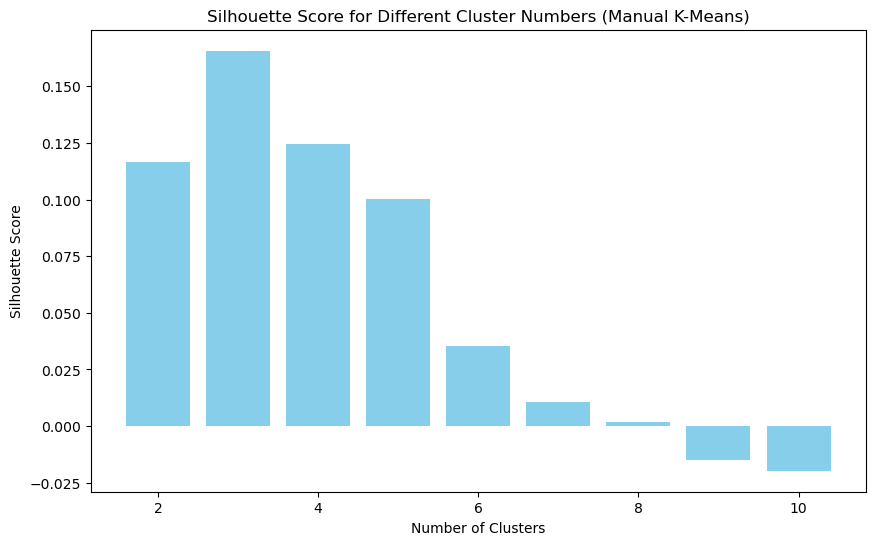

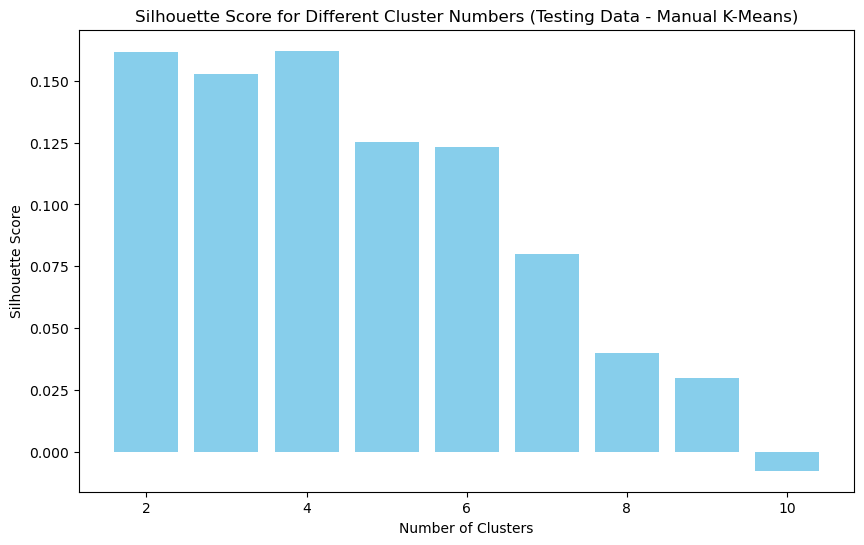

In [49]:
cluster_range = range(2, 11)

# List to store silhouette scores
silhouette_scores = []

# Calculate silhouette scores for different cluster numbers
for num_clusters in cluster_range:
    cluster_labels, _ = manual_k_means(X_train[:, :2], num_clusters, random_state=42)
    silhouette_avg = silhouette_score(X_train, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Visualize the silhouette scores
plt.figure(figsize=(10, 6))
plt.bar(cluster_range, silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers (Manual K-Means)')
plt.show()

# List to store silhouette scores for testing data
test_silhouette_scores = []

# Calculate silhouette scores for different cluster numbers on testing data
for num_clusters in cluster_range:
    test_cluster_labels, _ = manual_k_means(X_test[:, :2], num_clusters, random_state=42)
    test_silhouette_avg = silhouette_score(X_test, test_cluster_labels)
    test_silhouette_scores.append(test_silhouette_avg)

# Visualize the silhouette scores for testing data
plt.figure(figsize=(10, 6))
plt.bar(cluster_range, test_silhouette_scores, color='skyblue')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Cluster Numbers (Testing Data - Manual K-Means)')
plt.show()


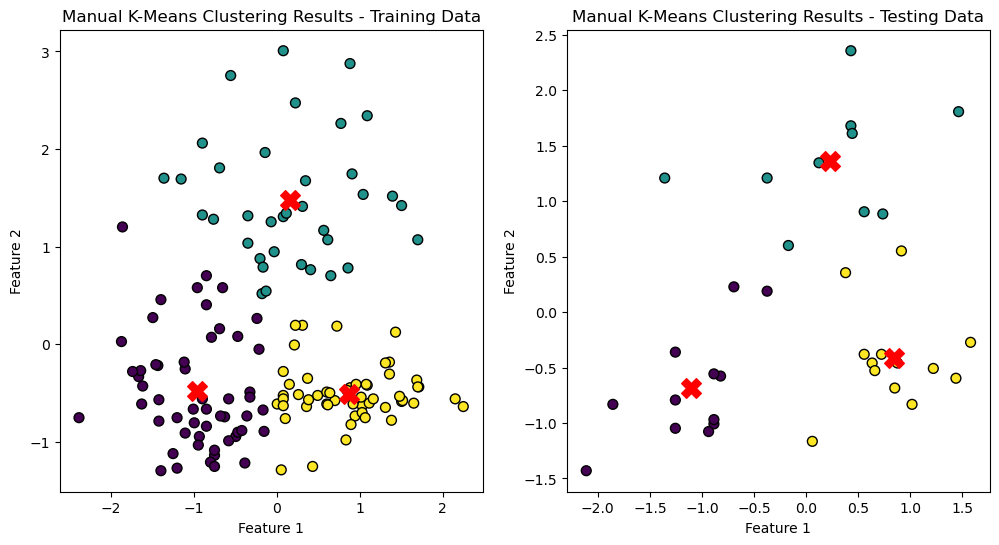

In [7]:
# Visualize the clusters for training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(train_cluster_centers[:, 0], train_cluster_centers[:, 1], s=200, c='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Manual K-Means Clustering Results - Training Data')

# Apply manual K-Means clustering to test data
test_cluster_labels, test_cluster_centers = manual_k_means(X_test[:, :2], num_clusters, random_state=42)

# Visualize the clusters for testing data
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_cluster_labels, cmap='viridis', edgecolor='k', s=50)
plt.scatter(test_cluster_centers[:, 0], test_cluster_centers[:, 1], s=200, c='red', marker='X')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Manual K-Means Clustering Results - Testing Data')

plt.show()

### Start of HDB scan experiment and Conclusion of K-means/Silhouette scoring
#### As expected from silhouette scoring, the K-Means clusters are looking little scattered rather than looking independent to each other. Weak on cohesion and Seperation

Experimentation began with HDB scan since K-means did not ahcieve certain level of score and cohesion/seperation. HDB scan is a density based clustering algorithm for identifying clustes of varying shpaes and sizes. HDB scan analysis done with hdbscan library. 

In [15]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 46.5 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for cython<3,>=0.27 from https://files.pythonhosted.org/packages/7e/26/9d8de10005fedb1eceabe713348d43bae1dbab1786042ca0751a2e2b0f8c/Cython-0.29.37-py2.py3-none-any.whl.metadata
  Using cached Cython-0.29.37-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached Cython-0.29.37-py2.py3-none-any.whl (989 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp311-cp311-macosx_11_0_arm64.whl size=594828 sha256=3c1cfca2cf46a62b10dee930b7110ecbaca314eca83c0394133ed255f711255a
  Stored in directory: /Users/sangjunelee/Library/Caches/pip/wheels/4e/8c/6f/d0495e4e40cbd27a8c7330d4e963837e099d6e16014dbdcdb5
Successfully built hdbscan
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

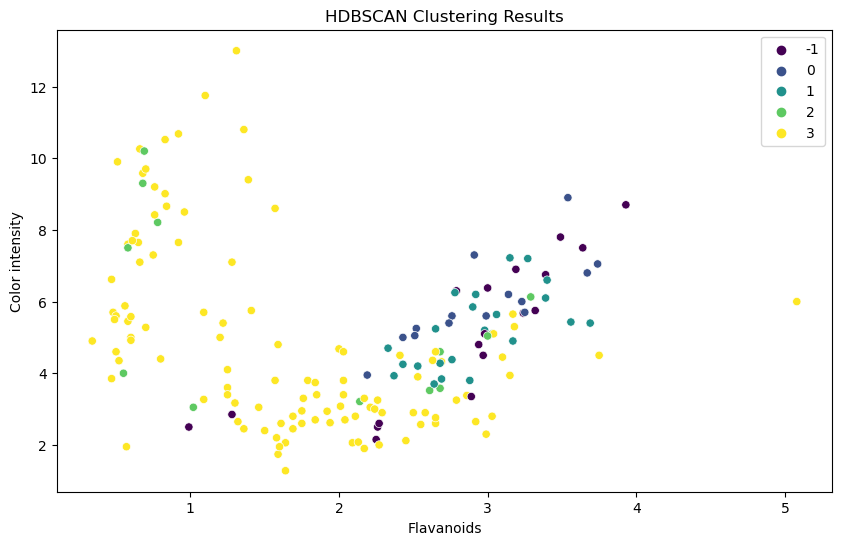

In [22]:
import seaborn as sns
import hdbscan

# Extract features
X = df.drop('Class', axis=1)

# Applying HDBSCAN
clusterer = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
cluster_labels = clusterer.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['Flavanoids'], y=X['Color intensity'], hue=cluster_labels, palette='viridis', legend='full')
plt.title('HDBSCAN Clustering Results')
plt.xlabel('Flavanoids')
plt.ylabel('Color intensity')
plt.show()



### HDB Scan experiment Result

Result shows as more not independent compare to K-means, which means that HDB scan has identified clusters in the data that may have varying shapes and densities as well as identifying clusters that may not be well-seperated or may have complex structures.

### PCA and Random Forest

#### PCA is a dimensionality reduction technique, focusing more principal components fo the data. Random Forest leverages multiple decision treees for classification

In [73]:
# PCA implementation on Wine dataset loading with columns done previously
# Standardize the features and Calculate the covariance matrix
# Ensuring each feature has a mean of 0 nad standard deviation of 0
X_standardized = (X - X.mean()) / X.std()
covariance_matrix = X_standardized.T @ X_standardized / (X_standardized.shape[0] - 1)

# Calculate eigenvalues and eigenvectors, sort eigenvalues and corresponding eigenvectors
# Eigenvectors: same direction as linear transformation
# eigenvalues : ratio of the vector distance change
# Sorting as ascending order
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Choosing the number of components to cut off
num_components = 2
principal_components = eigenvectors[:, :num_components]



In [74]:
def standardize_data(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    standardized_X = (X - mean) / std
    return standardized_X, mean, std

# PCA Implementation
def pca(X, num_components):
    # Calculating the covariance matrix
    cov_matrix = np.cov(X, rowvar=False)

    # Calculating eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    principal_components = eigenvectors[:, :num_components]

    # Project the data onto the new subspace
    transformed_data = X.dot(principal_components)

    return transformed_data, principal_components

# Apply PCA to standardized training and testing data
X_train_standardized, mean_train, std_train = standardize_data(X_train.values)
X_test_standardized = (X_test.values - mean_train) / std_train

num_pca_components = 2  #number of PCA components
X_train_pca, pca_components = pca(X_train_standardized, num_pca_components)
X_test_pca = (X_test_standardized).dot(pca_components)

# Define a simple Decision Tree class
class DecisionTree:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.X = X
        self.y = y
        self.num_classes = len(np.unique(y))
        self.tree = self.build_tree(X, y, depth=0)

    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(np.unique(y)) == 1:
            # Stopping the split if maximum depth is reached or if all labels are the same
            return {'class': np.argmax(np.bincount(y)), 'depth': depth}

        num_features = X.shape[1]
        best_feature = None
        best_threshold = None
        best_gini = float('inf')

        for feature in range(num_features):
            thresholds = np.unique(X[:, feature])
            for threshold in thresholds:
                left_mask = X[:, feature] <= threshold
                right_mask = ~left_mask
                gini = self.calculate_gini(y[left_mask], y[right_mask])

                if gini < best_gini:
                    best_gini = gini
                    best_feature = feature
                    best_threshold = threshold

        if best_feature is not None:
            left_mask = X[:, best_feature] <= best_threshold
            right_mask = ~left_mask
            left_subtree = self.build_tree(X[left_mask], y[left_mask], depth + 1)
            right_subtree = self.build_tree(X[right_mask], y[right_mask], depth + 1)

            return {'feature': best_feature, 'threshold': best_threshold,
                    'left': left_subtree, 'right': right_subtree, 'depth': depth}
        else:
            return {'class': np.argmax(np.bincount(y)), 'depth': depth}

    def calculate_gini(self, left_labels, right_labels):
        # Implementing Gini impurity calculation
        total_samples = len(left_labels) + len(right_labels)
        gini_left = 1.0 - np.sum((np.bincount(left_labels) / len(left_labels))**2)
        gini_right = 1.0 - np.sum((np.bincount(right_labels) / len(right_labels))**2)
        weighted_gini = (len(left_labels) / total_samples) * gini_left + (len(right_labels) / total_samples) * gini_right
        return weighted_gini

    def predict(self, X):
        # Implementing the prediction logic based on the trained decision tree
        predictions = np.zeros(X.shape[0], dtype=int)
        for i in range(X.shape[0]):
            predictions[i] = self.traverse_tree(X[i], self.tree)
        return predictions

    def traverse_tree(self, x, node):
        # Recursively traverse the decision tree to make predictions
        if 'class' in node:
            return node['class']
        else:
            if x[node['feature']] <= node['threshold']:
                return self.traverse_tree(x, node['left'])
            else:
                return self.traverse_tree(x, node['right'])

# Training a Random Forest manually on the PCA-transformed training data
class RandomForest:
    def __init__(self, num_trees=10, max_depth=None):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        for _ in range(self.num_trees):
            # Randomly select a subset of the data for each tree
            indices = np.random.choice(len(X), len(X), replace=True)
            subset_X, subset_y = X[indices], y[indices]
            
            # Then, train a Decision Tree on this subset
            tree = DecisionTree(max_depth=self.max_depth)
            tree.fit(subset_X, subset_y)
            self.trees.append(tree)

    def predict(self, X):
        # Predictions by aggregating the predictions from each tree
        # Implementing the logic to combine predictions from individual trees
        predictions = np.zeros((X.shape[0], self.num_trees), dtype=int)
        for i, tree in enumerate(self.trees):
            predictions[:, i] = tree.predict(X)

        # Aggregate predictions using majority voting
        aggregated_predictions = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)
        return aggregated_predictions


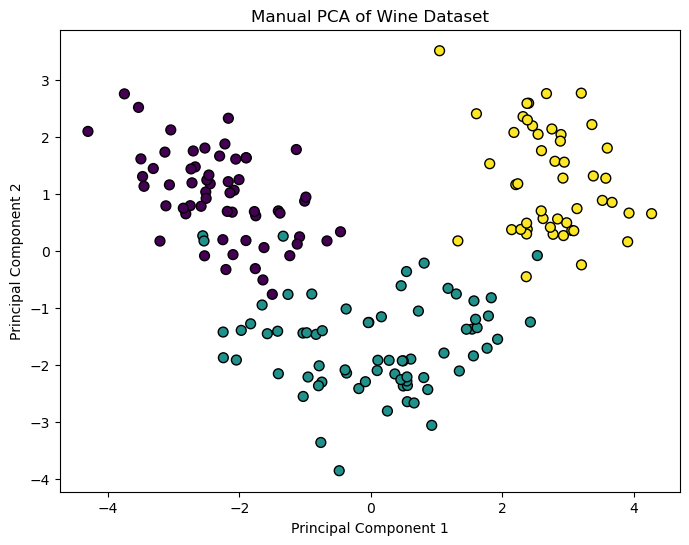

Accuracy on the Test Set (after PCA): 0.81


In [75]:
# Transform the data using the selected principal components
X_pca = X_standardized @ principal_components

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], c=df['Class'], cmap='viridis', edgecolor='k', s=50)
plt.title('Manual PCA of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Split the data into training and testing sets
# Assuming a 80-20 split
split_index = int(0.8 * len(df))
train_data, test_data = df[:split_index], df[split_index:]


random_forest_pca = RandomForest(num_trees=10, max_depth=None)
random_forest_pca.fit(X_train_pca, y_train.values)

# Make predictions on the PCA-transformed testing data
y_pred_pca = random_forest_pca.predict(X_test_pca)

# Evaluate the accuracy manually
accuracy_pca = np.sum(y_pred_pca == y_test.values) / len(y_test)
print(f'Accuracy on the Test Set (after PCA): {accuracy_pca:.2f}')


### PCA and Random Forest analysis and Result

The accuracy on the test set after applying PCA is 0.81. This accuracy value represents the proportion of correctly predicted class labels in the test set.

An accuracy of 0.81 suggests that the Random Froest model trained on the PCA transformed data is perfomrming reasonably well on the test set. It's capturing the underlying patterns in the data and making correct predictions for a significant portion of the samples in the test set. 

### Evaluation
Each algorithm has its strengths and limitations. 

Manual K-Means provides interpretable clusters, but the choice of the number of clusters is crucial. 

PCA reduces dimensionality but may lose some information. 

Random Forest is powerful but may require careful parameter tuning. 

HDBSCAN is robust but may struggle with high-dimensional data.

Selecting right algorithm is important since project itself improved on second selection of algorithm. If K-means achieved certain level of satisfaction, in real life the PCA and Random Forest would not be necessary to do. As well as cross validation might utilize more robust and reliable estimate of the model performance. This ensures that the model's performance is not overly opimistic or pessimistic due to a particular splits. 

### Conclusion

This project aimed to apply various machine learning techniques to the Wine dataset and assess their performance. The findings reveal valuable insights into the dataset and the efficacy of different algorithms.

#### Clustering Performance:

K-Means clustering, when applied to the dataset, demonstrated moderate performance with silhouette scores of approximately 0.17 on the training set and 0.15 on the testing set. The silhouette score measures the cohesion and separation of clusters, indicating reasonable clustering tendencies.

HDBSCAN, an alternative clustering algorithm, exhibited non-independent scattered plots, suggesting its ability to capture complex cluster structures in the data.

However both of clustering algorithms did not achieve certain level of accurate result.

#### PCA and Random Forest:

Principal Component Analysis (PCA) was successfully employed to reduce the dimensionality of the dataset. The first two principal components provided a visually distinct separation of classes.

A Random Forest model, trained on the PCA-transformed data, achieved an accuracy of 0.81 on the test set. This suggests that the selected principal components retained essential information for accurate classification.

#### Challenges and Areas for Improvement:

Challenges encountered include the need for parameter tuning in clustering algorithms, especially in the determination of the number of clusters.

Hyperparameter tuning, feature engineering, and further exploration of algorithms could enhance the overall model performance. Additionally, understanding the dataset's intricacies and leveraging domain expertise may contribute to better feature selection and model interpretability.

## Reference

#### ref.1.0 (Dataset information)
#### https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
#### Achieve aim  : comparison of different algorithms on a dataset

##### This is a copy of UCI ML Wine recognition datasets. https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

#### The data is the results of a chemical analysis of wines grown in the same region in Italy by three different cultivators. There are thirteen different measurements taken for different constituents found in the three types of wine.

#### Original Owners:

#### Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy.

#### Citation:

#### Lichman, M. (2013). UCI Machine Learning Repository [https://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

#### Number of Instances:
178

#### Number of Attributes:
13 numeric, predictive attributes and the class

#### Attribute Information:
Alcohol
Malic acid
Ash
Alcalinity of ash
Magnesium
Total phenols
Flavanoids
Nonflavanoid phenols
Proanthocyanins
Color intensity
Hue
OD280/OD315 of diluted wines
Proline